Student Details

Name: Cathal Cronin

ID: 10131531

# Lab 5: Feature Selection 

This notebook builds on top of Lab 4 by introducing feature selection into the process of selecting the best classifier for a binary classification problem.

The feature selection method applied here is Recursive Feature Elimination (RFE) as demonstrated in the tutorial at https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/.

In this demonstration we use a modified version of the seeds data set (see https://archive.ics.uci.edu/ml/datasets/seeds), which is the same data set used in Lab 4.

## A. Preparation

### Import Python modules

In [23]:
import pandas as pd
import numpy as np

from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

import warnings; warnings.simplefilter('ignore')

### Load and prepare the dataset for training and evaluation
Feel free to apply any other pre-processing technique at this point.

In [24]:
lab5_df = pd.read_csv("./winequality_red.csv")
lab5_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [25]:
# target attribute
target_attribute_name = 'quality'
target = lab5_df[target_attribute_name]

# predictor attributes
predictors = lab5_df.drop(target_attribute_name, axis=1).values

# scale all predictor values to the range [0, 1]
# note the target attribute is already binary
min_max_scaler = preprocessing.MinMaxScaler()
predictors = min_max_scaler.fit_transform(predictors)

Split the data set into a training (80%) and test (20%) data sets.

In [26]:
# pepare independent stratified data sets for training and test of the final model
predictors_train, predictors_test, target_train, target_test = train_test_split(
    predictors, target, test_size=0.20, shuffle=True, stratify=target)

## B. Feature Selection

#### 1. Apply RFE with SVM for selecting the best features

In [27]:
# create a base classifier used to evaluate a subset of attributes
estimatorSVM = svm.SVR(kernel="linear")
selectorSVM = RFE(estimatorSVM, 3)
selectorSVM = selectorSVM.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorSVM.support_)
print(selectorSVM.ranking_)

[False  True False False False False False False False  True  True]
[6 1 9 4 2 7 3 5 8 1 1]


#### 2. Apply RFE with Logistic Regression for selecting the best features

In [28]:
# create a base classifier used to evaluate a subset of attributes
estimatorLR = LogisticRegression()
# create the RFE model and select 3 attributes
selectorLR = RFE(estimatorLR, 3)
selectorLR = selectorLR.fit(predictors_train, target_train)
# summarize the selection of the attributes
print(selectorLR.support_)
print(selectorLR.ranking_)

[False  True False False False False  True False False False  True]
[5 1 8 9 7 4 1 3 6 2 1]


## B. Evaluate on the Test Data Set

Apply the selectors to prepare training data sets only with the selected features

__Note:__ The same selectors are applied to the test data set. However, it is important that the test data set was not used by (it's invisible to) the selectors. 

In [29]:
predictors_train_SVMselected = selectorSVM.transform(predictors_train)
predictors_test_SVMselected = selectorSVM.transform(predictors_test)

In [30]:
predictors_train_LRselected = selectorLR.transform(predictors_train)
predictors_test_LRselected = selectorLR.transform(predictors_test)

### Train and evaluate SVM classifiers with both the selected features and all features 

Here we train three models:
* model1 - with the features selected by SVM
* model2 - with the features selected by Logistic Regression
* model3 - with all features (i.e. without feature selection)

In [31]:
classifier = svm.SVC()

In [32]:
model1 = classifier.fit(predictors_train_SVMselected, target_train)
model1.score(predictors_test_SVMselected, target_test)

0.603125

In [33]:
model2 = classifier.fit(predictors_train_LRselected, target_train)
model2.score(predictors_test_LRselected, target_test)

0.615625

In [34]:
model3 = classifier.fit(predictors_train, target_train)
model3.score(predictors_test, target_test)

0.6

## C. Conclusion

The results above, give evidence that model1 is most accurate.

However, when you execute this code again, it is very likely to get different results.

To get more accurate results, accounting for the variance in the results, it is better to run the whole experiment multiple times and measure the variance in the results. Then pick the model that gives better results.

### Task 2
- Repeat the experiment in Etivity5-Feature Selection.ipynb with winequality_red.csv but this time run the whole experiment in a loop with different training/test stratified splits. Evaluate the three models for each iteration of the loop separately and boxplot the accuracies of the models for each iteration. Compare the results of this experiment to the results of Task 1 in a markdown cell (max 150 words).

In [38]:
def experiment(estimator, predictors_train, predictors_test, target_train, target_test, use_rfe=True):

    if use_rfe:
        selector = RFE(estimator, 3)
        selector = selector.fit(predictors_train, target_train)
        
        predictors_train_selected = selector.transform(predictors_train)
        predictors_test_selected = selector.transform(predictors_test)
    else:
        predictors_train_selected = predictors_train
        predictors_test_selected = predictors_test

    # score classifier
    classifier = svm.SVC()
    model = classifier.fit(predictors_train_selected, target_train)
    model_score = model.score(predictors_test_selected, target_test)
        
    return model_score;
    

def run_experiment(repeats):
    rfe_svm_scores = []
    rfe_lr_scores = []
    no_rfe_scores = []

    for exp_num in range (0, repeats):
        
        # Split data with different training / test stratified splits.
        predictors_train, predictors_test, target_train, target_test = train_test_split(
        predictors, target, test_size=0.20, shuffle=True, stratify=target)
        
        # Normalise
        predictors_train = min_max_scaler.fit_transform(predictors_train)
        predictors_test = min_max_scaler.fit_transform(predictors_test)
        
        # Create a base classifiers SVM and Logistic Regression
        estimatorSVM = svm.SVR(kernel="linear")
        estimatorLR = LogisticRegression()
        
        rfe_svm_scores.append(experiment(estimatorSVM, predictors_train, predictors_test, target_train, target_test))
        rfe_lr_scores.append(experiment(estimatorLR, predictors_train, predictors_test, target_train, target_test))
        
        # Normal
        no_rfe_scores.append(experiment(None, predictors_train, predictors_test, target_train, target_test, use_rfe=False))
        
    return rfe_svm_scores, rfe_lr_scores, no_rfe_scores

# Repeat up to 100 times
num_repeats = 100
rfe_svm_scores, rfe_lr_scores, no_rfe_scores = run_experiment(num_repeats)
print("SVM with RFE Scores: %s" % rfe_svm_scores)
print("RFE Logis Regression Scores: %s" % rfe_lr_scores)
print("No RFE Scores: %s" % no_rfe_scores)


SVM with RFE Scores: [0.559375, 0.596875, 0.58125, 0.590625, 0.55625, 0.58125, 0.55625, 0.5625, 0.5125, 0.58125, 0.5125, 0.51875, 0.5625, 0.56875, 0.5625, 0.596875, 0.534375, 0.53125, 0.54375, 0.575, 0.58125, 0.575, 0.53125, 0.540625, 0.55, 0.528125, 0.553125, 0.559375, 0.571875, 0.540625, 0.559375, 0.5125, 0.571875, 0.56875, 0.578125, 0.53125, 0.571875, 0.56875, 0.5625, 0.578125, 0.525, 0.571875, 0.584375, 0.584375, 0.503125, 0.571875, 0.603125, 0.55625, 0.584375, 0.559375, 0.578125, 0.55625, 0.575, 0.6125, 0.521875, 0.515625, 0.559375, 0.5625, 0.575, 0.55625, 0.6, 0.584375, 0.559375, 0.603125, 0.578125, 0.559375, 0.575, 0.590625, 0.596875, 0.553125, 0.553125, 0.5375, 0.559375, 0.5625, 0.55, 0.54375, 0.596875, 0.571875, 0.559375, 0.546875, 0.584375, 0.59375, 0.575, 0.590625, 0.56875, 0.553125, 0.625, 0.58125, 0.546875, 0.534375, 0.559375, 0.546875, 0.540625, 0.559375, 0.56875, 0.55, 0.60625, 0.5, 0.540625, 0.5625]
RFE Logis Regression Scores: [0.575, 0.596875, 0.60625, 0.59375, 0.5437

In [41]:
# Draw results in a boxplot to view scores

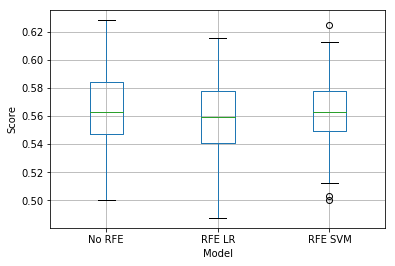

In [44]:
import matplotlib.pyplot as plt
dataset.boxplot()
plt.xlabel('Model')
plt.ylabel('Score')
plt.show()

TODO: summary goes here...

- We can see from the above boxplots that the mean scores are roughly the same across all 3 models. ALl giving rought ~56% to ~58%.
- The SVM with RFE edges out both other models slightly. Which is as we would expect. and the logistic regression is more sensitive to outliers than our SVM.

- Ref: https://towardsdatascience.com/support-vector-machine-vs-logistic-regression-94cc2975433f

### Task 3
- Build two pipelines for training classifiers for the dataset winequality_red.csv and summarise the results from training classifiers with the pipelines in a markdown cell (max 150 words). The two pipelines should include feature-selection methods, and the feature-selection method in pipeline 1 should be different from the feature-selection method in pipeline 2.

#### pipeline 1

In [16]:
# create feature union
features = []
features.append(('rfe', RFE(LogisticRegression(), 3)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, predictors, target, cv=kfold)
print(results.mean())

NameError: name 'FeatureUnion' is not defined

#### pipeline 2

In [ ]:
# create feature union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression()))
model = Pipeline(estimators)

# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, predictors, target, cv=kfold)
print(results.mean())

- summary stuff heere